In [2]:
%matplotlib inline

import h5py
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [3]:
filepath = '../data/trajectories/ngsim.h5'
f = h5py.File(filepath, 'r')

In [4]:
feature_names = f.attrs['feature_names']
traj_idx = '1'
x = f[traj_idx].value
print(feature_names)
print(x.shape)

['relative_offset' 'relative_heading' 'velocity' 'length' 'width'
 'lane_curvature' 'markerdist_left' 'markerdist_right' 'accel' 'jerk'
 'turn_rate_global' 'angular_rate_global' 'turn_rate_frenet'
 'angular_rate_frenet' 'timegap' 'timegap_is_avail' 'time_to_collision'
 'time_to_collision_is_avail' 'is_colliding' 'out_of_lane'
 'negative_velocity' 'lidar_1' 'lidar_2' 'lidar_3' 'lidar_4' 'lidar_5'
 'lidar_6' 'lidar_7' 'lidar_8' 'lidar_9' 'lidar_10' 'lidar_11' 'lidar_12'
 'lidar_13' 'lidar_14' 'lidar_15' 'lidar_16' 'lidar_17' 'lidar_18'
 'lidar_19' 'lidar_20' 'rangerate_lidar_1' 'rangerate_lidar_2'
 'rangerate_lidar_3' 'rangerate_lidar_4' 'rangerate_lidar_5'
 'rangerate_lidar_6' 'rangerate_lidar_7' 'rangerate_lidar_8'
 'rangerate_lidar_9' 'rangerate_lidar_10' 'rangerate_lidar_11'
 'rangerate_lidar_12' 'rangerate_lidar_13' 'rangerate_lidar_14'
 'rangerate_lidar_15' 'rangerate_lidar_16' 'rangerate_lidar_17'
 'rangerate_lidar_18' 'rangerate_lidar_19' 'rangerate_lidar_20']
(160, 499, 61)


In [5]:
def compute_lengths(arr):
    sums = np.sum(np.array(arr), axis=2)
    lengths = []
    for sample in sums:
        zero_idxs = np.where(sample == 0.)[0]
        if len(zero_idxs) == 0:
            lengths.append(len(sample))
        else:
            lengths.append(zero_idxs[0])
    return np.array(lengths)

In [6]:
lengths = compute_lengths(x)

(array([  3.,   2.,   4.,   1.,   3.,   3.,   1.,   2.,   3.,   3.,   3.,
          2.,   5.,   2.,   2.,   1.,   3.,   6.,   0.,   4.,   2.,   2.,
          4.,   2.,   4.,   3.,   3.,   2.,   1.,   5.,   3.,   4.,   2.,
          5.,   3.,   9.,   1.,   9.,   3.,   6.,   8.,   4.,  10.,   3.,
          3.,   3.,   0.,   2.,   0.,   1.]),
 array([   1.  ,   10.96,   20.92,   30.88,   40.84,   50.8 ,   60.76,
          70.72,   80.68,   90.64,  100.6 ,  110.56,  120.52,  130.48,
         140.44,  150.4 ,  160.36,  170.32,  180.28,  190.24,  200.2 ,
         210.16,  220.12,  230.08,  240.04,  250.  ,  259.96,  269.92,
         279.88,  289.84,  299.8 ,  309.76,  319.72,  329.68,  339.64,
         349.6 ,  359.56,  369.52,  379.48,  389.44,  399.4 ,  409.36,
         419.32,  429.28,  439.24,  449.2 ,  459.16,  469.12,  479.08,
         489.04,  499.  ]),
 <a list of 50 Patch objects>)

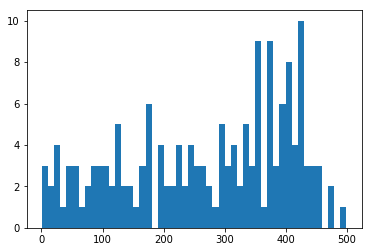

In [7]:
plt.hist(lengths, 50)

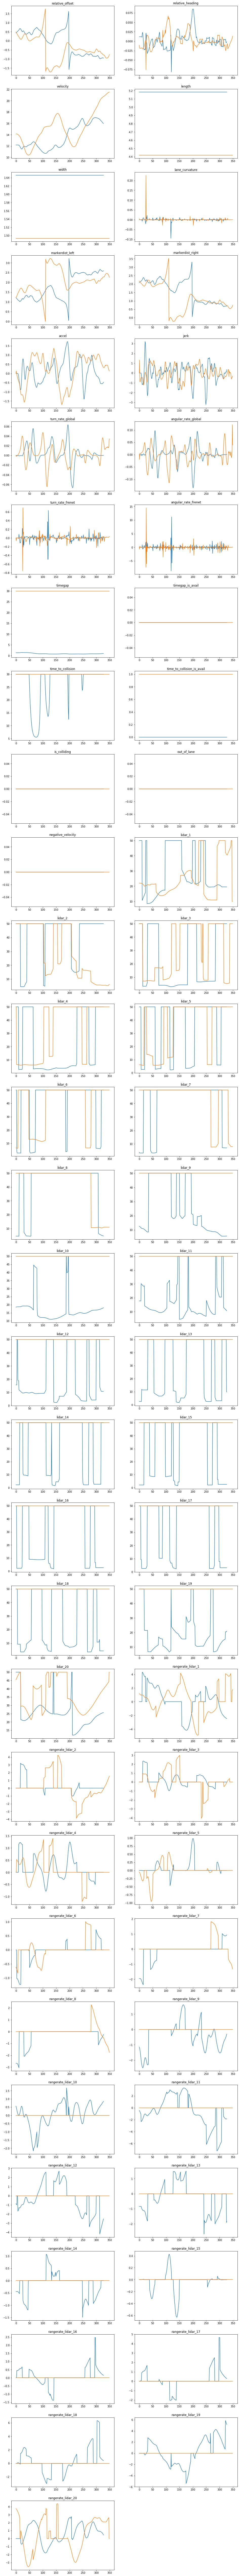

In [9]:
max_traj = 2
nrow = 31
ncol = 2
plt.figure(figsize=(ncol*8, nrow*6))
for i, fn in enumerate(feature_names):
    for j in range(max_traj):
        plt.subplot(nrow, ncol, i+1)
        plt.plot(x[j,:lengths[j],i])
        plt.title(fn)